In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import random
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg
from skimage import data
import h5py
import os


C:\Users\hm114\miniconda3\envs\GAN\lib\site-packages\PIL\Image.py:2600: DecompressionBombWarning: Image size (144000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


TypeError: '>' not supported between instances of 'TiffImageFile' and 'int'

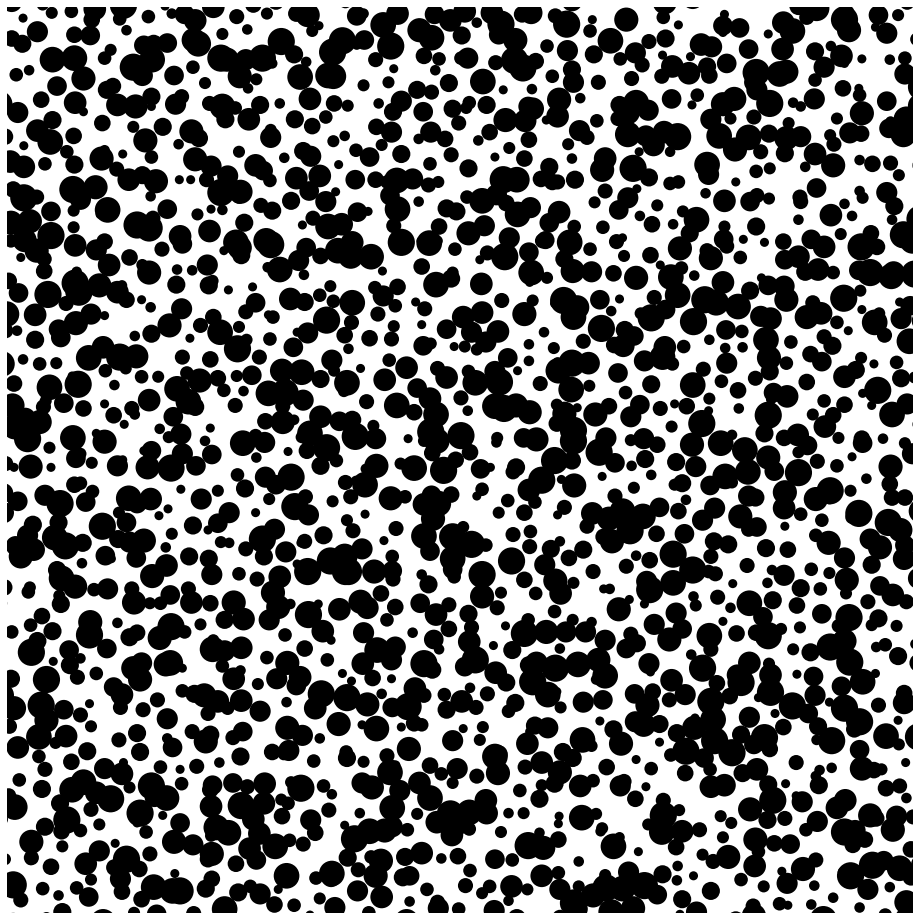

In [4]:
# Draws circles on a offset grid with a radius(rad), deviation in radius, and deviation in center of the circle
# Deviations are random integers(pixels) between zero and devmax.
# Saves the model to hdf5 along with the location and radius of each circle
# Draws 12 realizations of MODEL A from PNAS paper.

wd = os.getcwd()
output_direc = "/image_output/"

rad = 12
stride = 40
offset = 20
x_dim = 1200
y_dim = 1200
xdevmax = 2
ydevmax = 2
raddevmax = 4
target_direc = wd+output_direc

for r in range(0,13,1):
    #raddevmax = r
    for c in range(0,1,1):
        #xdevmax = c
        #ydevmax = c
        x_coor = []
        y_coor = []
        r_coor = []
        for j in range(0,x_dim+offset,stride):
            counter = 0
            for k in range(0, y_dim+offset, stride):
                if (counter % 2) == 0:
                    x_coor.append(j+random.randint(-xdevmax,xdevmax))
                    y_coor.append(k+random.randint(-ydevmax,ydevmax))
                    r_coor.append(rad+random.randint(-raddevmax,raddevmax))
                    x_coor.append(j+random.randint(-xdevmax,xdevmax))
                    y_coor.append(k+stride+random.randint(-ydevmax,ydevmax))
                    r_coor.append(rad+random.randint(-raddevmax,raddevmax))
                else:
                    x_coor.append(j+offset+random.randint(-xdevmax,xdevmax))
                    y_coor.append(k+offset+random.randint(-ydevmax,ydevmax))
                    r_coor.append(rad+random.randint(-raddevmax,raddevmax))
                    x_coor.append(j-offset+random.randint(-xdevmax,xdevmax))
                    y_coor.append(k-offset+random.randint(-ydevmax,ydevmax))
                    r_coor.append(rad+random.randint(-raddevmax,raddevmax))
                counter = counter+1

        fig, ax = plt.subplots()
        ax.set_xlim((0, x_dim))
        ax.set_ylim((0, y_dim))
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.axis('off')
        DPI = fig.get_dpi()
        fig.set_size_inches(x_dim/float(DPI),y_dim/float(DPI))

        i = 0
        while i < len (x_coor):
            circle = patch.Circle((x_coor[i], y_coor[i]), r_coor[i], color='black', fill=True, linewidth = 0)
            ax.add_artist(circle)
            i = i+1

        fig.savefig(target_direc+"/"+"perfectlyoffsetcircles_rad"+str(rad*10)+"_raddev"+str(raddevmax*10)+"_coordev"+str(xdevmax*10)+"_repeat"+str(r)+"_BIG.tiff", bbox_inches='tight', pad_inches=0, dpi=DPI*13.246)

        img = plt.imread(target_direc+"/"+"perfectlyoffsetcircles_rad"+str(rad*10)+"_raddev"+str(raddevmax*10)+"_coordev"+str(xdevmax*10)+"_repeat"+str(r)+"_BIG.tiff")
        binary = (img > 254)*1
        binary2 = binary [:,:,0]
        Porosity = (binary2 == 1).sum()/((binary2 == 0).sum()+(binary2 == 1).sum())

        g = h5py.File(target_direc+"/"+"perfectlyoffsetcircles_rad"+str(rad*10)+"_raddev"+str(raddevmax*10)+"_coordev"+str(xdevmax*10)+"_repeat"+str(r)+"_BIG.hdf5", 'w')
        g.create_dataset('x_coor', data=np.array(x_coor)*10, dtype="float", compression="gzip")
        g.create_dataset('y_coor', data=np.array(x_coor)*10, dtype="float", compression="gzip")
        g.create_dataset('rad', data=np.array(r_coor)*10, dtype="uint16", compression="gzip")
        g.create_dataset('binary_image', data=binary2, dtype="uint8", compression="gzip")
        g.attrs['porosity'] = Porosity
        g.attrs['rad'] = rad*10
        g.attrs['stride'] = stride*10
        g.attrs['offset'] = offset*10
        g.attrs['xdevmax'] = xdevmax*10
        g.attrs['ydevmax'] = ydevmax*10
        g.attrs['raddevmax'] = raddevmax*10
        g.close()

        os.remove(target_direc+"/"+"perfectlyoffsetcircles_rad"+str(rad*10)+"_raddev"+str(raddevmax*10)+"_coordev"+str(xdevmax*10)+"_repeat"+str(r)+"_BIG.tiff")

In [ ]:
# Draws 12 realizations of MODEL B from PNAS paper.

wd = os.getcwd()
output_direc = "/image_output/"

rad = 12
stride = 40
offset = 20
x_dim = 1200
y_dim = 1200
xdevmax = 12
ydevmax = 12
raddevmax = 6
target_direc = wd+output_direc

for r in range(0,13,1):
    #raddevmax = r
    for c in range(0,1,1):
        #xdevmax = c
        #ydevmax = c
        x_coor = []
        y_coor = []
        r_coor = []
        for j in range(0,x_dim+offset,stride):
            counter = 0
            for k in range(0, y_dim+offset, stride):
                if (counter % 2) == 0:
                    x_coor.append(j+random.randint(-xdevmax,xdevmax))
                    y_coor.append(k+random.randint(-ydevmax,ydevmax))
                    r_coor.append(rad+random.randint(-raddevmax,raddevmax))
                    x_coor.append(j+random.randint(-xdevmax,xdevmax))
                    y_coor.append(k+stride+random.randint(-ydevmax,ydevmax))
                    r_coor.append(rad+random.randint(-raddevmax,raddevmax))
                else:
                    x_coor.append(j+offset+random.randint(-xdevmax,xdevmax))
                    y_coor.append(k+offset+random.randint(-ydevmax,ydevmax))
                    r_coor.append(rad+random.randint(-raddevmax,raddevmax))
                    x_coor.append(j-offset+random.randint(-xdevmax,xdevmax))
                    y_coor.append(k-offset+random.randint(-ydevmax,ydevmax))
                    r_coor.append(rad+random.randint(-raddevmax,raddevmax))
                counter = counter+1

        fig, ax = plt.subplots()
        ax.set_xlim((0, x_dim))
        ax.set_ylim((0, y_dim))
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.axis('off')
        DPI = fig.get_dpi()
        fig.set_size_inches(x_dim/float(DPI),y_dim/float(DPI))

        i = 0
        while i < len (x_coor):
            circle = patch.Circle((x_coor[i], y_coor[i]), r_coor[i], color='black', fill=True, linewidth = 0)
            ax.add_artist(circle)
            i = i+1

        fig.savefig(target_direc+"/"+"perfectlyoffsetcircles_rad"+str(rad*10)+"_raddev"+str(raddevmax*10)+"_coordev"+str(xdevmax*10)+"_repeat"+str(r)+"_BIG.tiff", bbox_inches='tight', pad_inches=0, dpi=DPI*13.246)

        img = plt.imread(target_direc+"/"+"perfectlyoffsetcircles_rad"+str(rad*10)+"_raddev"+str(raddevmax*10)+"_coordev"+str(xdevmax*10)+"_repeat"+str(r)+"_BIG.tiff")
        binary = (img > 254)*1
        binary2 = binary [:,:,0]
        Porosity = (binary2 == 1).sum()/((binary2 == 0).sum()+(binary2 == 1).sum())

        g = h5py.File(target_direc+"/"+"perfectlyoffsetcircles_rad"+str(rad*10)+"_raddev"+str(raddevmax*10)+"_coordev"+str(xdevmax*10)+"_repeat"+str(r)+"_BIG.hdf5", 'w')
        g.create_dataset('x_coor', data=np.array(x_coor)*10, dtype="float", compression="gzip")
        g.create_dataset('y_coor', data=np.array(x_coor)*10, dtype="float", compression="gzip")
        g.create_dataset('rad', data=np.array(r_coor)*10, dtype="uint16", compression="gzip")
        g.create_dataset('binary_image', data=binary2, dtype="uint8", compression="gzip")
        g.attrs['porosity'] = Porosity
        g.attrs['rad'] = rad*10
        g.attrs['stride'] = stride*10
        g.attrs['offset'] = offset*10
        g.attrs['xdevmax'] = xdevmax*10
        g.attrs['ydevmax'] = ydevmax*10
        g.attrs['raddevmax'] = raddevmax*10
        g.close()

        os.remove(target_direc+"/"+"perfectlyoffsetcircles_rad"+str(rad*10)+"_raddev"+str(raddevmax*10)+"_coordev"+str(xdevmax*10)+"_repeat"+str(r)+"_BIG.tiff")
